In [25]:
import pandas as pd


df = pd.read_json('final_data/iclr2024_1000_qwen.json')
df

,submission_id,submission_number,submission_creation_date,submission_authors,submission_title,submission_abstract,reviewer,creation_date,last_modification_date,review_rating,...,llm_Actionability,llm_Constructiveness,llm_Relevance Alignment,llm_Clarity and Readability,llm_Usage of Technical Terms,llm_Factuality,llm_Overall Quality,llm_overall_score_100,llm_Sentiment Polarity,llm_Politeness
0,zxPDdw8koz,4303,1695343783421,"[~Mohammadreza_Salehi3, ~Mehrdad_Farajtabar1, ...",CLIP meets Model Zoo Experts: Pseudo-Supervisi...,Contrastive language image pretraining (CLIP) ...,Reviewer_BcRN,1698598642014,1699636398632,3,...,3,4,5.0,4.0,4.0,factual,85.0,85.0,positive,polite
1,zxPDdw8koz,4303,1695343783421,"[~Mohammadreza_Salehi3, ~Mehrdad_Farajtabar1, ...",CLIP meets Model Zoo Experts: Pseudo-Supervisi...,Contrastive language image pretraining (CLIP) ...,Reviewer_hJxN,1698648844616,1699636398538,3,...,4,4,5.0,4.0,4.0,partially factual,65.0,65.0,neutral,neutral
2,zxPDdw8koz,4303,1695343783421,"[~Mohammadreza_Salehi3, ~Mehrdad_Farajtabar1, ...",CLIP meets Model Zoo Experts: Pseudo-Supervisi...,Contrastive language image pretraining (CLIP) ...,Reviewer_8Cdu,1698863097320,1699636398427,3,...,4,4,5.0,5.0,5.0,partially factual,88.0,88.0,neutral,polite
3,zxPDdw8koz,4303,1695343783421,"[~Mohammadreza_Salehi3, ~Mehrdad_Farajtabar1, ...",CLIP meets Model Zoo Experts: Pseudo-Supervisi...,Contrastive language image pretraining (CLIP) ...,Reviewer_Q843,1699416352034,1699636398331,8,...,4,4,5.0,4.0,4.0,factual,85.0,85.0,positive,polite
4,zt8bb6vC4m,4003,1695329721281,"[~Jianyu_Xu1, ~Yu-Xiang_Wang1]",Pricing with Contextual Elasticity and Heteros...,We study an online contextual dynamic pricing ...,Reviewer_6Reb,1698589805767,1699636362362,6,...,5,5,5.0,4.0,5.0,partially factual,85.0,85.0,neutral,polite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,09iOdaeOzp,4531,1695351755791,"[~Mengzhou_Xia1, ~Tianyu_Gao1, ~Zhiyuan_Zeng3,...",Sheared LLaMA: Accelerating Language Model Pre...,"The popularity of LLaMA (Touvron et al., 2023a...",Reviewer_qt4Y,1698822664319,1699636430275,8,...,5,5,5.0,5.0,5.0,factual,95.0,95.0,positive,polite
3831,09iOdaeOzp,4531,1695351755791,"[~Mengzhou_Xia1, ~Tianyu_Gao1, ~Zhiyuan_Zeng3,...",Sheared LLaMA: Accelerating Language Model Pre...,"The popularity of LLaMA (Touvron et al., 2023a...",Reviewer_wgpN,1698839708409,1699636430183,5,...,4,4,5.0,4.0,5.0,factual,85.0,85.0,neutral,polite
3832,030cjlZm4a,9267,1695548092232,"[~Yukti_Makhija1, ~Edward_De_Brouwer1, ~Rahul_...",Learning Predictive Checklists with Probabilis...,Checklists have been widely recognized as effe...,Reviewer_SxKf,1698683826765,1700488544114,8,...,4,4,5.0,4.0,5.0,partially factual,85.0,85.0,neutral,polite
3833,030cjlZm4a,9267,1695548092232,"[~Yukti_Makhija1, ~Edward_De_Brouwer1, ~Rahul_...",Learning Predictive Checklists with Probabilis...,Checklists have been widely recognized as effe...,Reviewer_Ucnh,1698794126465,1699637167426,3,...,4,4,5.0,4.0,5.0,partially factual,80.0,80.0,neutral,polite


In [26]:
# plot correlation map for columns starting with 'llm'
df.columns

Index(['submission_id', 'submission_number', 'submission_creation_date',
       'submission_authors', 'submission_title', 'submission_abstract',
       'reviewer', 'creation_date', 'last_modification_date', 'review_rating',
       'review_confidence', 'review_soundness', 'review_presentation',
       'review_contribution', 'total_review', 'length_words', 'citation_count',
       'question_count', 'mattr', 'sentiment_polarity', 'similarity_score',
       'paper_submission_to_review_submission_days',
       'review_creation_to_review_submission_days', 'flesch_reading_ease',
       'flesch_kincaid_grade', 'gunning_fog', 'smog_index',
       'automated_readability_index', 'politeness_score', 'hedge_C', 'hedge_D',
       'hedge_E', 'hedge_I', 'hedge_N', 'llm_Comprehensiveness',
       'llm_Vagueness', 'llm_Objectivity', 'llm_Fairness', 'llm_Actionability',
       'llm_Constructiveness', 'llm_Relevance Alignment',
       'llm_Clarity and Readability', 'llm_Usage of Technical Terms',
       '

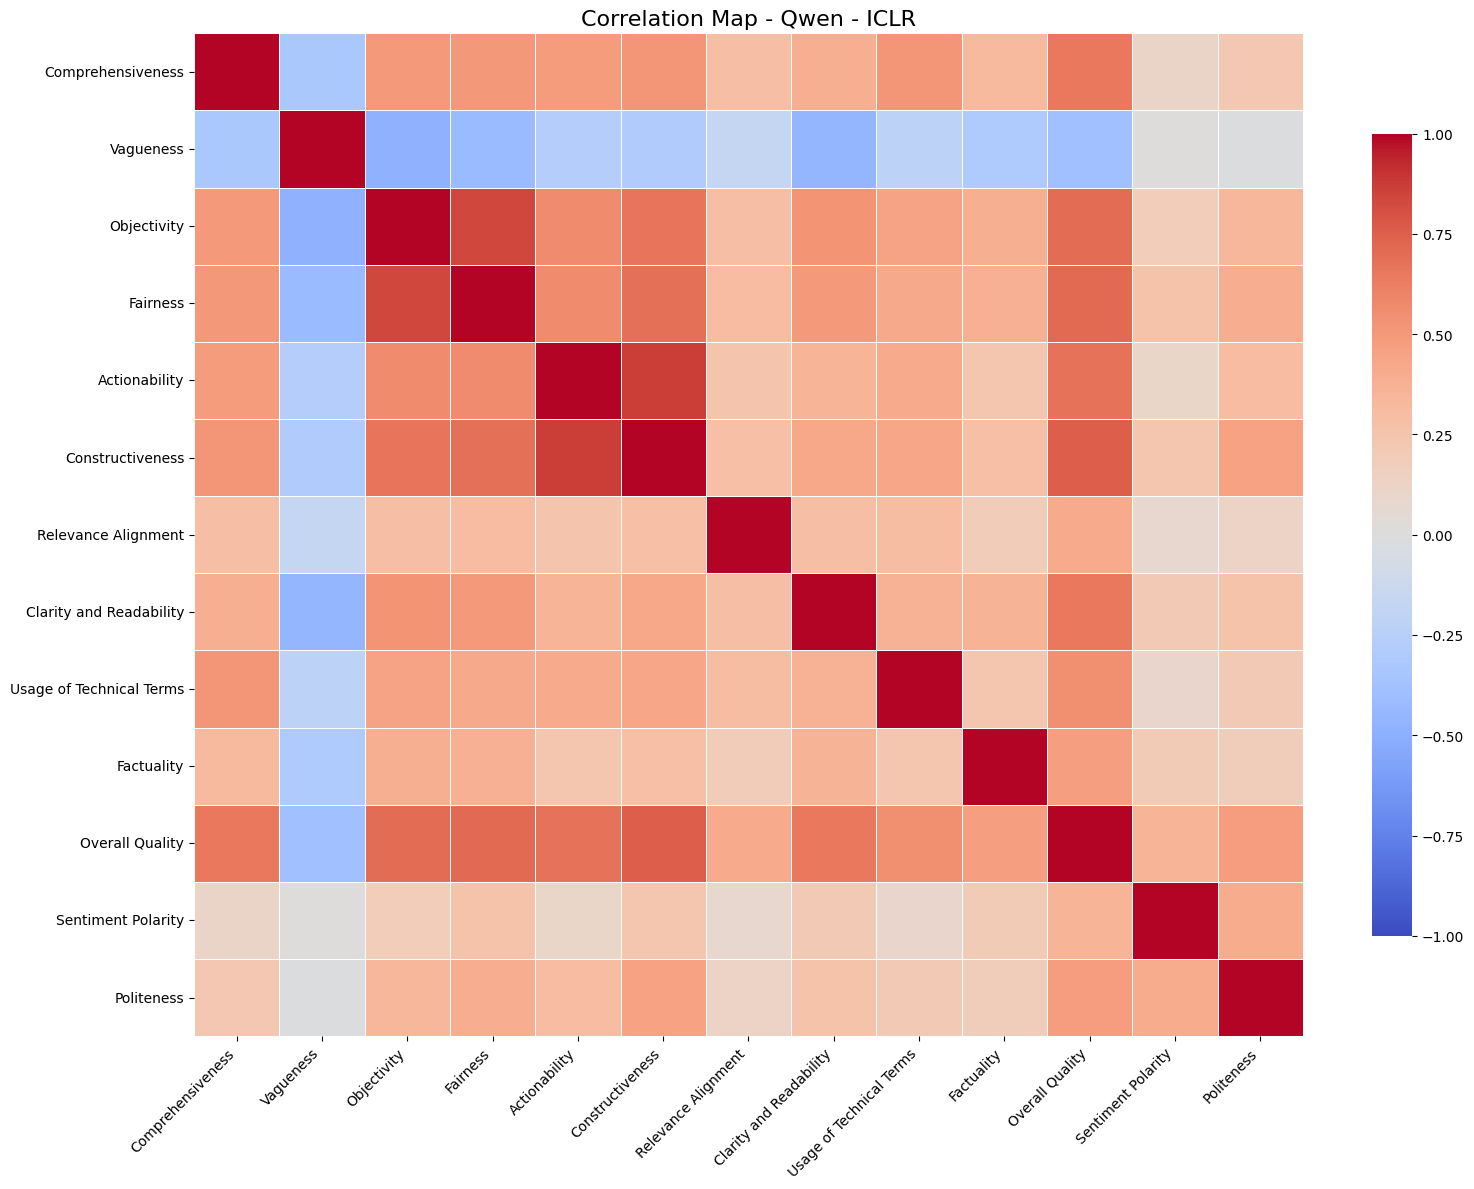

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter and clean the data
llm_columns = [col for col in df.columns if col.startswith('llm_')]
df_llm = df[llm_columns].dropna()
df_llm = df_llm.drop(['llm_overall_score_100'], axis=1)

# 2. Define validation rules and categorical mappings
validation_rules = {
    'Comprehensiveness': {'type': 'int', 'range': (0, 5)},
    'Usage of Technical Terms': {'type': 'int', 'range': (0, 5)},
    'Factuality': {'type': 'categorical', 'values': ['factual', 'partially factual', 'unfactual']},
    'Sentiment Polarity': {'type': 'categorical', 'values': ['negative', 'neutral', 'positive']},
    'Politeness': {'type': 'categorical', 'values': ['polite', 'neutral', 'impolite']},
    'Vagueness': {'type': 'categorical', 'values': ['none', 'low', 'moderate', 'high', 'extreme']},
    'Objectivity': {'type': 'int', 'range': (0, 5)},
    'Fairness': {'type': 'int', 'range': (0, 5)},
    'Actionability': {'type': 'int', 'range': (0, 5)},
    'Constructiveness': {'type': 'int', 'range': (0, 5)},
    'Relevance Alignment': {'type': 'int', 'range': (0, 5)},
    'Clarity and Readability': {'type': 'int', 'range': (0, 5)},
    'Overall Quality': {'type': 'int', 'range': (0, 100)}
}

categorical_mappings = {
    'Factuality': {'unfactual': 0, 'partially factual': 1, 'factual': 2},
    'Sentiment Polarity': {'negative': 0, 'neutral': 1, 'positive': 2},
    'Politeness': {'impolite': 0, 'neutral': 1, 'polite': 2},
    'Vagueness': {'none': 0, 'low': 1, 'moderate': 2, 'high': 3, 'extreme': 4}
}

# Modified step 3: Clean and validate data with type conversion
for col in df_llm.columns:
    base_name = col.replace('llm_', '')
    rule = validation_rules[base_name]
    
    if rule['type'] == 'int':
        # Convert to numeric first (handle strings like '3' -> 3)
        df_llm[col] = pd.to_numeric(df_llm[col], errors='coerce')
        min_val, max_val = rule['range']
        valid_mask = df_llm[col].between(min_val, max_val)
    else:
        valid_mask = df_llm[col].isin(rule['values'])
    
    df_llm = df_llm[valid_mask]

# 4. Encode categorical features
for col, mapping in categorical_mappings.items():
    full_col = f'llm_{col}'
    df_llm[full_col] = df_llm[full_col].map(mapping)

# 5. Prepare correlation matrix
df_llm.columns = [col.replace('llm_', '') for col in df_llm.columns]
corr_matrix = df_llm.corr()

# 6. Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            annot=False, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            linewidths=0.5,
            annot_kws={'size': 8},
            vmax=1,
            vmin=-1,
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Map - Qwen - ICLR', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()